# Group 1

## Uni : yz4661

## Name : Evan Zhou

## Github repository: https://github.com/DX0ZART/ML_Project_1 


## Submission Due Date: 10/10/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



In [1]:
import matplotlib.pyplot as plt

## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
whr_df = pd.read_csv('data/WHR_2023.csv')

# Inspect the first few rows to understand the structure
print(whr_df.columns)
whr_df.head(5)


Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [3]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 4 happiness categories: Very Low, Low, High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'], 
                                       q=5, 
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes   ## Complete in a similar manner as above

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

**What `y_train.astype('category').cat.codes` does:**
- Converts `y_train` to a Pandas *Categorical* type, then returns the integer code for each category.
- Each distinct class in `y_train` is mapped to an integer `0..K-1` (and `NaN` → `-1`).  
- The mapping follows the category order (by default lexicographic).

**Difference between `y_train_labels` and `y_train`:**
- `y_train`: original labels `'Very Low'`, `'Low'`,`'Average'`, `'High'`, `'Very High'`.
- `y_train_labels`: numeric-encoded version of those labels suitable for models needing integers.


<h3> Add new data

In [4]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("data/newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [5]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

# Check which countries are common in both datasets
common_countries = set(X_train['country']).intersection(set(countrydata['country_name']))
print(f"Common countries in training set: {common_countries}")

# Use left join to keep all rows from X_train and X_test
X_train = X_train.merge(countrydata, how='left',
                        left_on='country', right_on='country_name') \
                 .drop(columns='country_name')

X_test  = X_test.merge(countrydata, how='left',
                       left_on='country', right_on='country_name') \
                .drop(columns='country_name')

Common countries in training set: {'Zambia', 'Uzbekistan', 'Togo', 'Afghanistan', 'Jordan', 'Zimbabwe', 'Ghana', 'Bosnia and Herzegovina', 'Bahrain', 'Portugal', 'Madagascar', 'Mauritania', 'Morocco', 'Serbia', 'South Korea', 'Tajikistan', 'Saudi Arabia', 'Lithuania', 'Iran', 'Indonesia', 'Mongolia', 'India', 'Slovakia', 'Finland', 'Peru', 'Netherlands', 'Nigeria', 'China', 'Sri Lanka', 'Uganda', 'Cambodia', 'Malta', 'Iceland', 'Colombia', 'Norway', 'Latvia', 'Ethiopia', 'Luxembourg', 'Guinea', 'Bolivia', 'Sweden', 'Thailand', 'Mali', 'Israel', 'Sierra Leone', 'Jamaica', 'Kosovo', 'Austria', 'Spain', 'Belgium', 'Australia', 'Italy', 'Mexico', 'Cyprus', 'Namibia', 'Romania', 'Denmark', 'Albania', 'Comoros', 'Kenya', 'Niger', 'Senegal', 'Chile', 'New Zealand', 'Pakistan', 'Greece', 'Estonia', 'Ivory Coast', 'Liberia', 'Dominican Republic', 'Ukraine', 'Poland', 'Iraq', 'Singapore', 'Mauritius', 'Tanzania', 'Bulgaria', 'El Salvador', 'Burkina Faso', 'Hungary', 'Venezuela', 'Nepal', 'Sloven

In [6]:
X_train.head(1)

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Madagascar,Sub-Saharan Africa,0.632,0.779,0.178,0.187,0.177,0.134,25570895.0,70.7,0.512149,65.515,10.34614,6.145955,1319.699397


## 1.  EDA

In [7]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

Your answer:

- We have two `text` columns: country and region.
- All the other columns are `numeric` (float64), such as GDP per capita, HDI, life expectancy, schooling years, etc.

Find out the number and percentage of missing values in the table per column

In [9]:
# Your code here:
missing_count = X_train.isnull().sum()
missing_percent = 100 * missing_count / len(X_train)

missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

missing_table[missing_table['Missing Values'] > 0]

,Missing Values,Percentage (%)
population_below_poverty_line,16,16.84
mean_years_of_schooling,7,7.37
expected_years_of_schooling,7,7.37
life_expectancy,7,7.37
gni,7,7.37
population,6,6.32
hdi,6,6.32


Plot the frequency distribution / histogram of some of the numerical features that you think are important

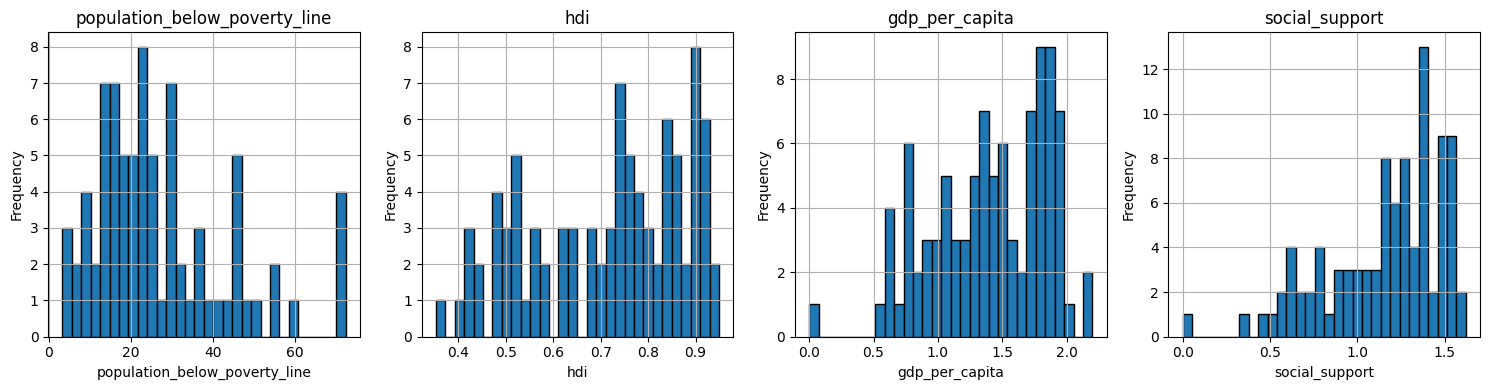

In [12]:
# Your plotting code here:

features = ["population_below_poverty_line", "hdi", 
            "gdp_per_capita", "social_support"]

plt.figure(figsize=(15, 4))

for i, col in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    X_train[col].hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

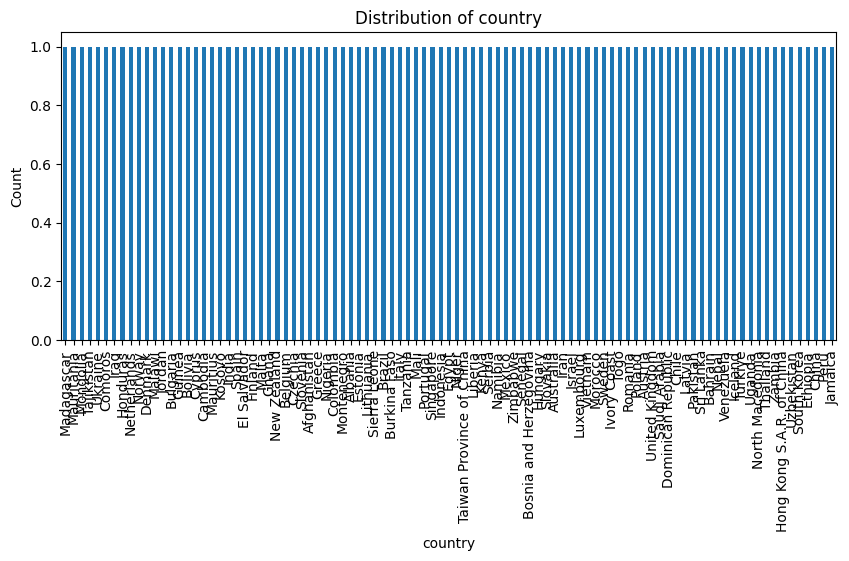

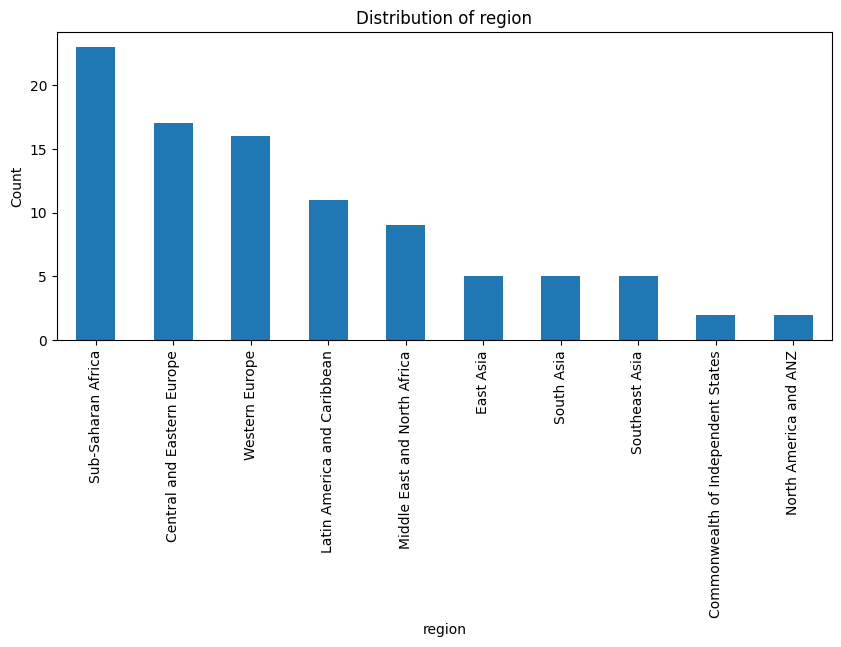

In [ ]:
# Your plotting code here:

categorical_cols = ["country", "region"]

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    X_train[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90) 
    plt.show()

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

In [14]:
# Your code here:

numeric_cols = X_train.select_dtypes(include='float64')

# Pearson (linear correlation)
pearson_corr = numeric_cols.corr(method='pearson')

# Spearman (rank-based, robust to outliers, non-linear monotonic relationships)
spearman_corr = numeric_cols.corr(method='spearman')

# Kendall (rank correlation, more strict than Spearman)
kendall_corr = numeric_cols.corr(method='kendall')

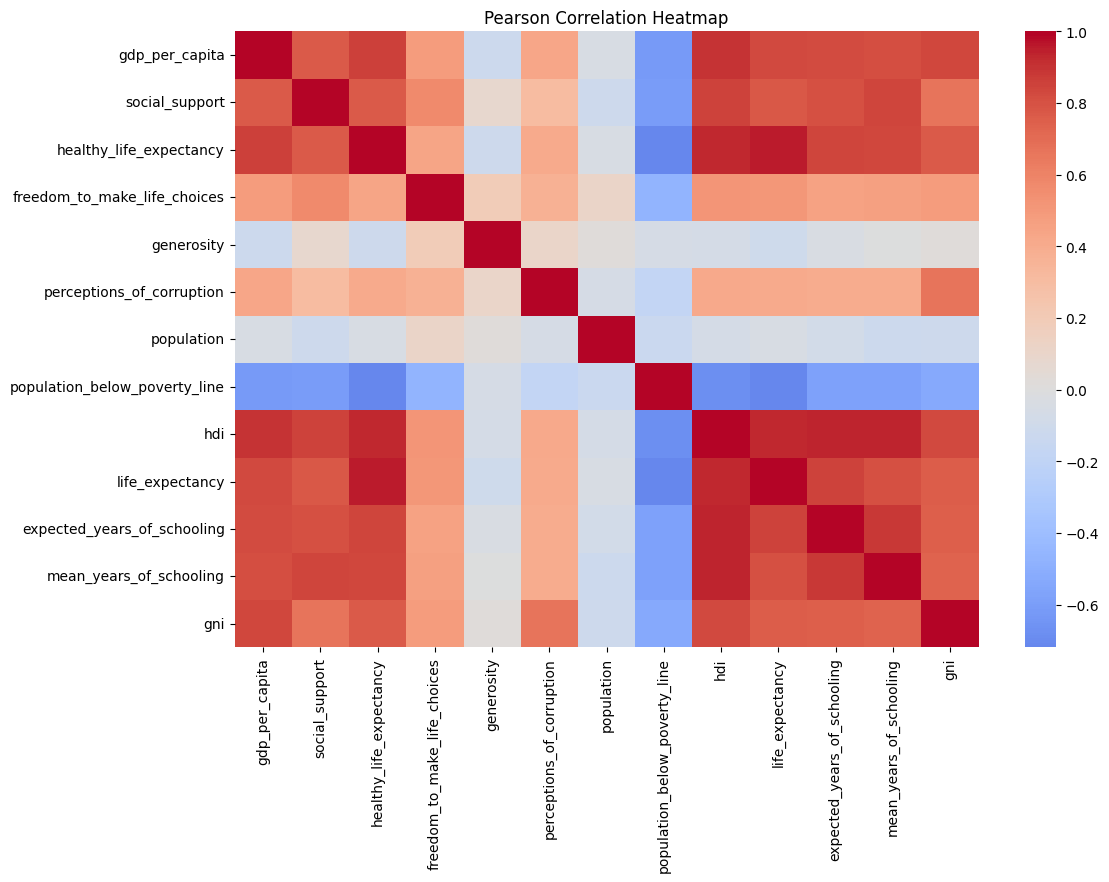

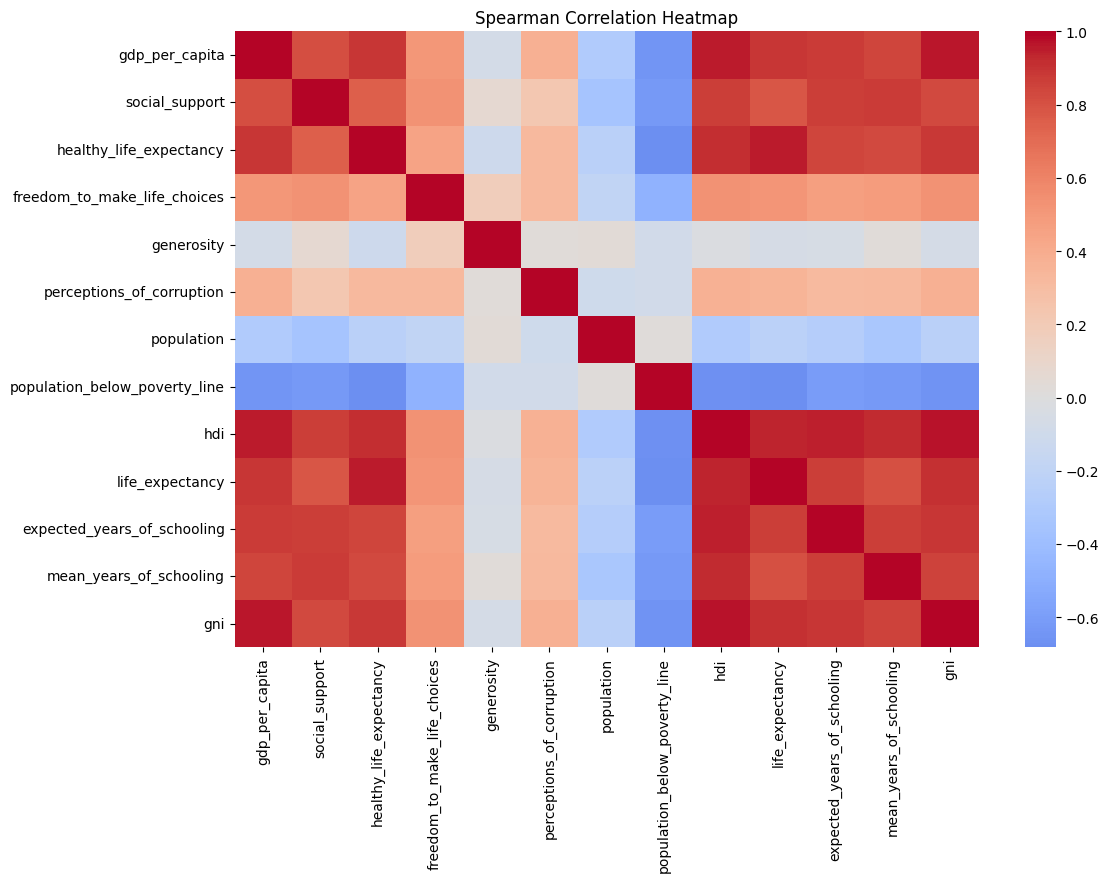

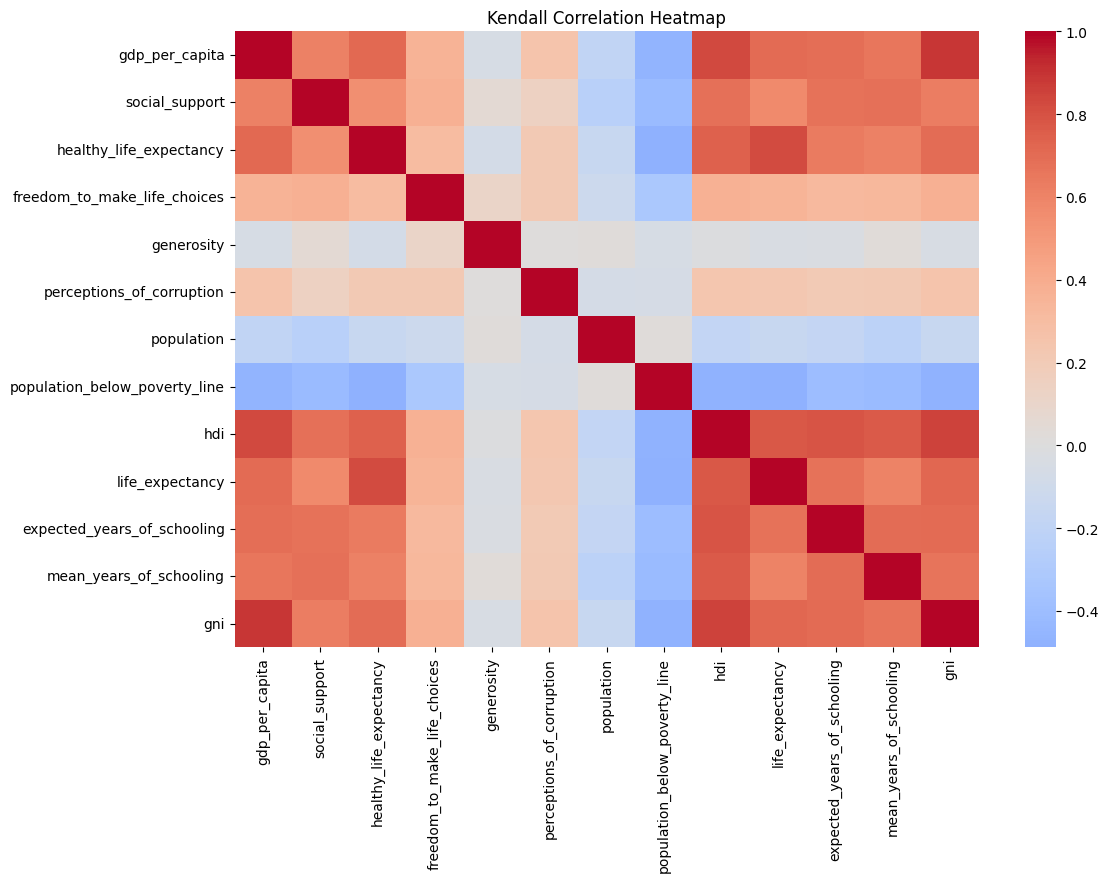

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Pearson Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(spearman_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Spearman Correlation Heatmap")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(kendall_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Kendall Correlation Heatmap")
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
# Your plotting code(s) here:

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [ ]:
# Your code here:

Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here

## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any). 

In [ ]:
# Your code here:

Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
# Your code here:

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = ## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  ## Fill here )),
    ('onehot', OneHotEncoder(handle_unknown= ## Fill here  ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer :

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = ## Define a Random Forest Model here, fit it, and score it

# Your cell should have a score between 0-1 as output

## 5. Generate predictions from X_test data and compare it with true labels in Y_test


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = ## Make a new model with changed parameters to improve the score

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = # Predict

## Write code to show model performance by comparing prediction_labels with true labels


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
#Submit Model 3:

#-- Generate predicted values


## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = ## Read documentations of imported models and fit them.

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

## 7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=#count features in input data

keras_model = ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels


Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
# Your code here:

In [ ]:
# Your comments about the change in performance

Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
# Your code here:

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer
# Define an explainer that will help us interpret the model's decisions
# (Hint: Use shap.Explainer with the trained model and X_test data)

explainer = ## Initialize SHAP explainer using the trained model

# Compute SHAP values for X_test
# This step generates Shapley values, which explain how each feature contributes to predictions
shap_values = ## Apply the explainer to X_test

# Generate SHAP summary plot
# This plot will show which features have the most impact on predictions
shap.summary_plot(## Pass the required parameters to create a summary plot)

# Your cell should output a SHAP summary plot showing the most important features.


<h3> Experimentation

In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked